In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings 
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
dirname ='data_cities/'
filename = 'Albury.csv'
file = os.path.join(dirname, filename)



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [98]:
plt.ion()
df = pd.read_csv(file)
df = df.drop(columns=['Location'])

In [99]:
# Raw Data
print(df.head())
print(df.shape)
print(df.info())
print(df.describe().T)

   MinTemp  MaxTemp  Evaporation  Sunshine RainToday  WindSpeed  WindDir  \
0     13.4     22.9     5.468232  7.611178        No       22.0   281.25   
1      7.4     25.1     5.468232  7.611178        No       13.0   292.50   
2     12.9     25.7     5.468232  7.611178        No       22.5   258.75   
3      9.2     28.0     5.468232  7.611178        No       10.0   112.50   
4     17.5     32.3     5.468232  7.611178        No       13.5   191.25   

   Humidity     Cloud   Temp  Pressure  AirDirChange  AirSpeedChange  
0      46.5  6.245704  19.35   1007.40        -11.25            22.0  
1      34.5  4.449406  20.75   1009.20          0.00            31.0  
2      34.0  3.203702  22.10   1008.15        -11.25            23.5  
3      30.5  4.449406  22.30   1015.20        -67.50            14.0  
4      57.5  7.500000  23.75   1008.40         78.75            27.5  
(2445, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 13 columns):

# Data Cleaning

In [100]:
# Data Cleaning
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'float64':
            val = df[col].mean()
            df[col] = df[col].fillna(val)
        else:
            df = df.dropna(subset=df.select_dtypes(include=['object']).columns)
    
     

In [101]:
print(df.isnull().sum())
print(df.columns)

MinTemp           0
MaxTemp           0
Evaporation       0
Sunshine          0
RainToday         0
WindSpeed         0
WindDir           0
Humidity          0
Cloud             0
Temp              0
Pressure          0
AirDirChange      0
AirSpeedChange    0
dtype: int64
Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'RainToday',
       'WindSpeed', 'WindDir', 'Humidity', 'Cloud', 'Temp', 'Pressure',
       'AirDirChange', 'AirSpeedChange'],
      dtype='object')


# EDA

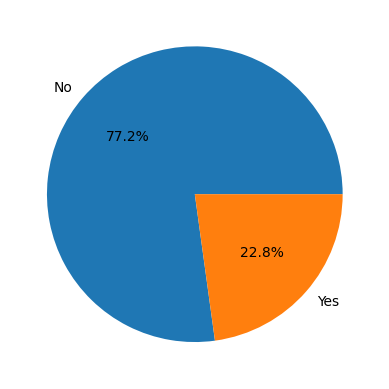

In [102]:

plt.pie(df['RainToday'].value_counts().values,
        labels = df['RainToday'].value_counts().index,
        autopct='%1.1f%%')

plt.show()

In [103]:
grouped_data = df.groupby('RainToday').mean()
print(grouped_data)

             MinTemp   MaxTemp  Evaporation  Sunshine  WindSpeed     WindDir  \
RainToday                                                                      
No         10.386642  24.83858     5.468232  7.611178  11.804187  167.015103   
Yes        10.336559  18.54086     5.468232  7.611178  15.202509  202.520161   

            Humidity     Cloud       Temp     Pressure  AirDirChange  \
RainToday                                                              
No         54.933309  4.817672  19.688246  1016.932141      8.704293   
Yes        73.988628  6.144419  15.196361  1012.741039      8.205645   

           AirSpeedChange  
RainToday                  
No              21.708797  
Yes             24.268817  


In [104]:
print(df.head())

   MinTemp  MaxTemp  Evaporation  Sunshine RainToday  WindSpeed  WindDir  \
0     13.4     22.9     5.468232  7.611178        No       22.0   281.25   
1      7.4     25.1     5.468232  7.611178        No       13.0   292.50   
2     12.9     25.7     5.468232  7.611178        No       22.5   258.75   
3      9.2     28.0     5.468232  7.611178        No       10.0   112.50   
4     17.5     32.3     5.468232  7.611178        No       13.5   191.25   

   Humidity     Cloud   Temp  Pressure  AirDirChange  AirSpeedChange  
0      46.5  6.245704  19.35   1007.40        -11.25            22.0  
1      34.5  4.449406  20.75   1009.20          0.00            31.0  
2      34.0  3.203702  22.10   1008.15        -11.25            23.5  
3      30.5  4.449406  22.30   1015.20        -67.50            14.0  
4      57.5  7.500000  23.75   1008.40         78.75            27.5  


In [105]:
features = list(df.select_dtypes(include = np.number).columns)
print(features)

['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindSpeed', 'WindDir', 'Humidity', 'Cloud', 'Temp', 'Pressure', 'AirDirChange', 'AirSpeedChange']


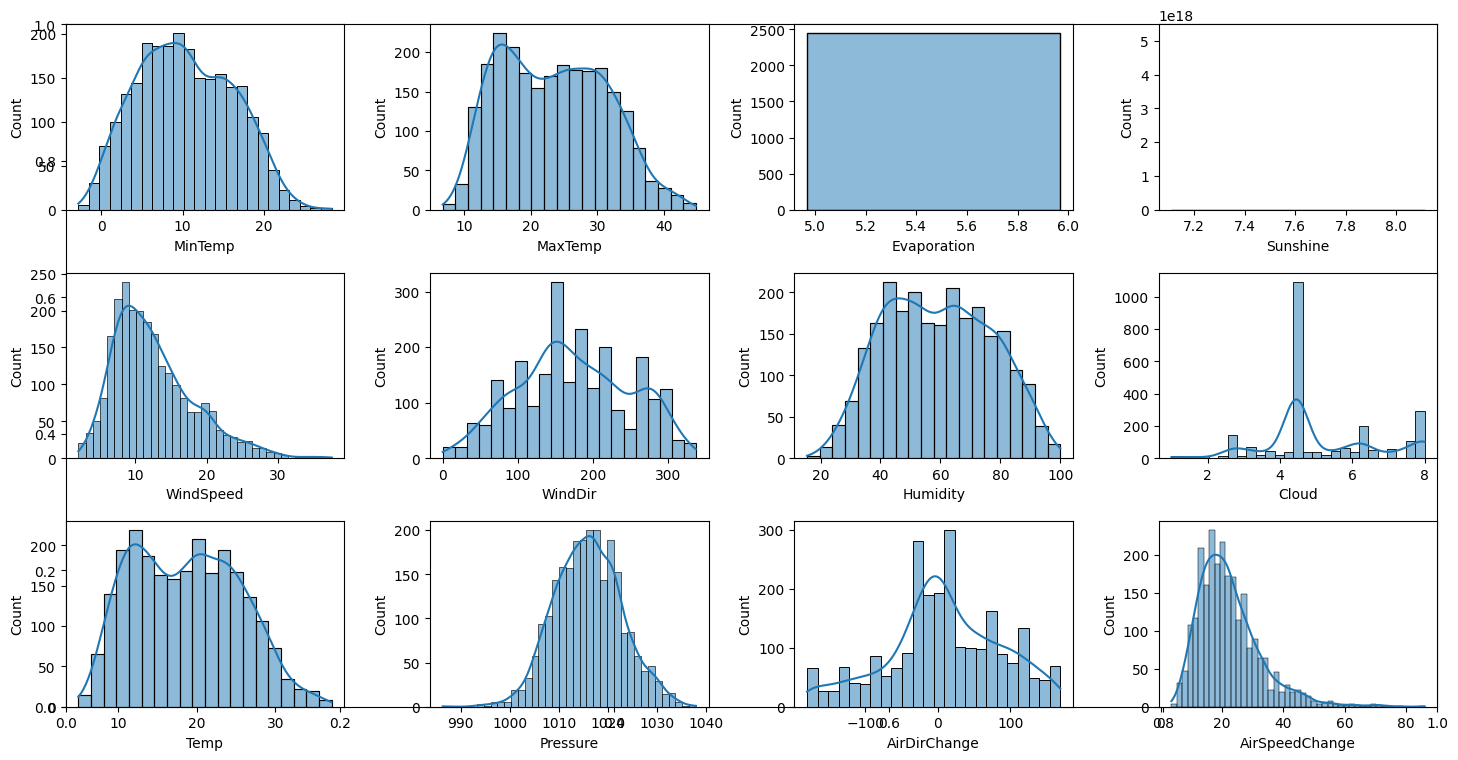

In [106]:
# features = features[:12]
min_data_points = 10  # Adjust this value as needed

# Filter features with sufficient data
filtered_features = [feature for feature in features if df[feature].count() >= min_data_points]

# Limit to a maximum of 12 features
filtered_features = filtered_features[:12]

plt.subplots(figsize=(15,8))
 
for i, col in enumerate(filtered_features):
    plt.subplot(3,4, i + 1)
    sb.histplot(df[col], kde=True) 
plt.tight_layout()
plt.show()

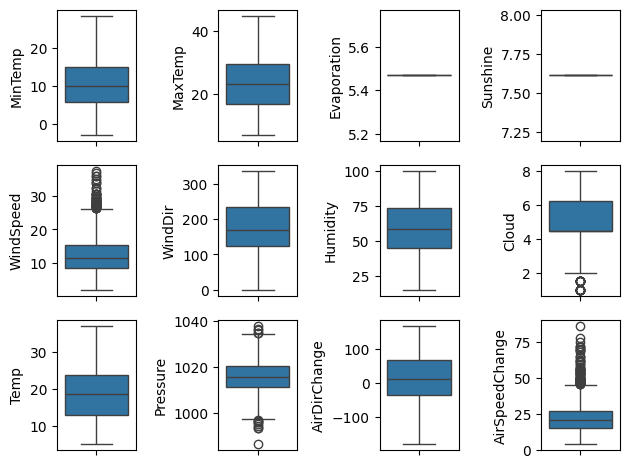

In [107]:

for i, col in enumerate(filtered_features):
    plt.subplot(3,4, i + 1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [108]:
df.replace({'yes':1, 'no':0}, inplace=True)
if df['RainToday'].dtype == 'object' and set(df['RainToday'].unique()).issubset({'Yes', 'No'}):
    # Map 'Yes' to 1 and 'No' to 0
    df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

# print(df['RainToday'].head())
# print(df['RainToday'].dtype)
# print(df['RainToday'].unique())



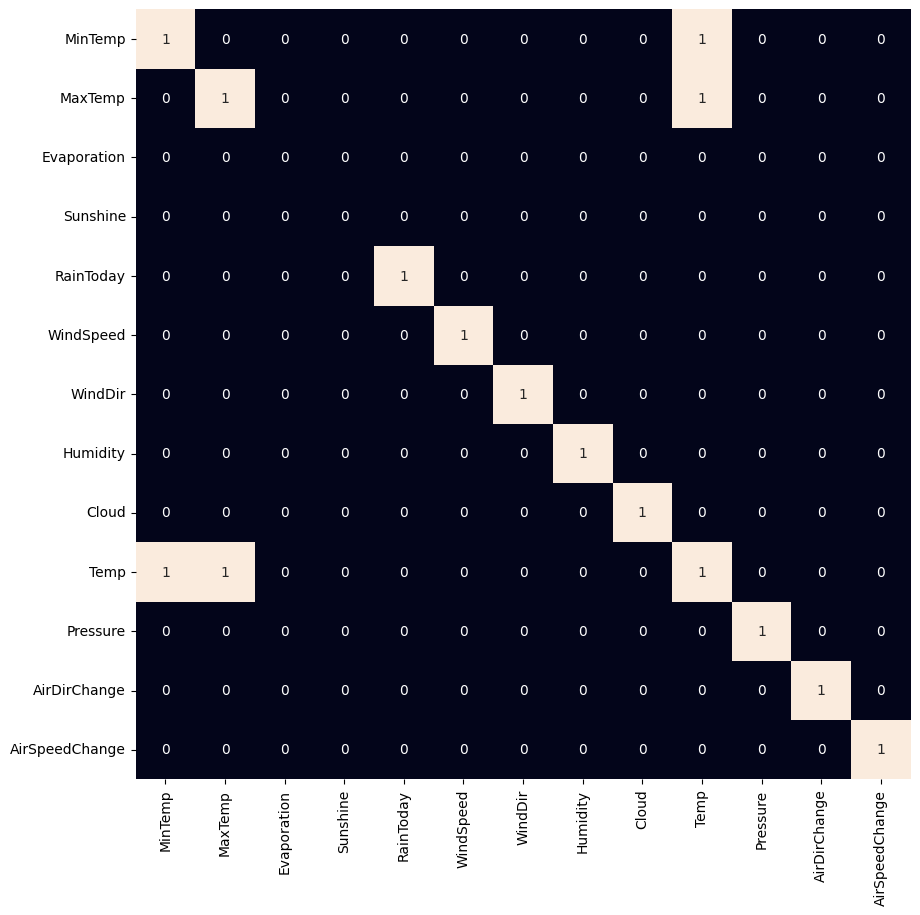

In [109]:
plt.figure(figsize=(10,10))
corr_matrix = df.corr(numeric_only=True)
sb.heatmap(corr_matrix > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [110]:
df.drop(['MaxTemp', 'MinTemp'], axis=1, inplace=True)

# Model Training

In [111]:
features = df.drop(['RainToday'], axis=1)
target = df.RainToday

In [112]:
# Creating training set for proper training
X_train, X_val, \
    Y_train, Y_val = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)
 
# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

In [113]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

1. LogisticRegression
2. XGBClassifier
3. SVC

This are classification models that we'll train

In [114]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]
 
for i in range(3):
    models[i].fit(X, Y)
 
    print(f'{models[i]} : ')
 
    train_preds = models[i].predict_proba(X) 
    print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))
 
    val_preds = models[i].predict_proba(X_val) 
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.8817863251611772
Validation Accuracy :  0.8787656309208033



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8539219401288366

SVC(probability=True) : 
Training Accuracy :  0.9209482040261392
Validation Accuracy :  0.8826970443349753



# Model Evaluation

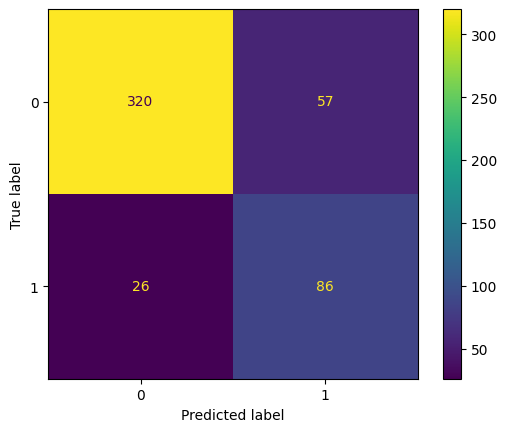

In [117]:
# metrics.plot_confusion_matrix(models[2], X_val, Y_val) # this has become invalid in current verson
# plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_val, models[2].predict(X_val))
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# Plot the confusion matrix
disp.plot()
# Show the plot
plt.show()

In [118]:
print(metrics.classification_report(Y_val, models[2].predict(X_val)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       377
           1       0.60      0.77      0.67       112

    accuracy                           0.83       489
   macro avg       0.76      0.81      0.78       489
weighted avg       0.85      0.83      0.84       489



Our Model isn't the best but ain't bad either, keep it up!